In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

In [ ]:
dataset = pd.read_csv('drive/MyDrive/datasets/creditcard.csv')
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preprocess

In [ ]:
dataset = dataset.dropna(axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

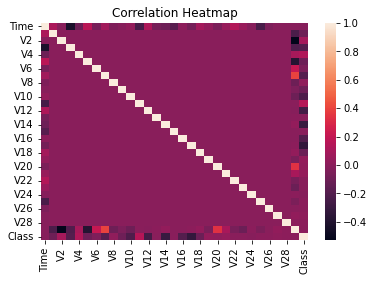

In [ ]:
corr = dataset.corr()
sb.heatmap(corr)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
scaler = StandardScaler()
# dataset_scaled = scaler.fit_transform(dataset)
# x_scaled = scaler.fit_transform(x)
dataset['Amount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Time'] = scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

0    0.998273
1    0.001727
Name: Class, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


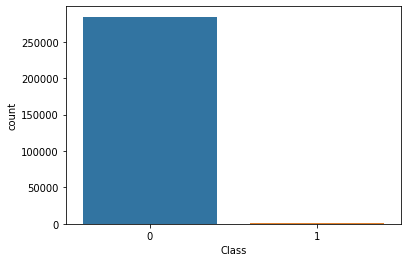

In [ ]:
x = dataset.drop(['Class'], axis = 1)
y = dataset['Class']
print(y.value_counts()/len(y))
sb.countplot(y)

In [ ]:
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(k=20)
# selector.fit(x, y)
x_sel = selector.fit_transform(x, y)
print(x.columns[selector.get_support()])

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27'],
      dtype='object')


0    0.5
1    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

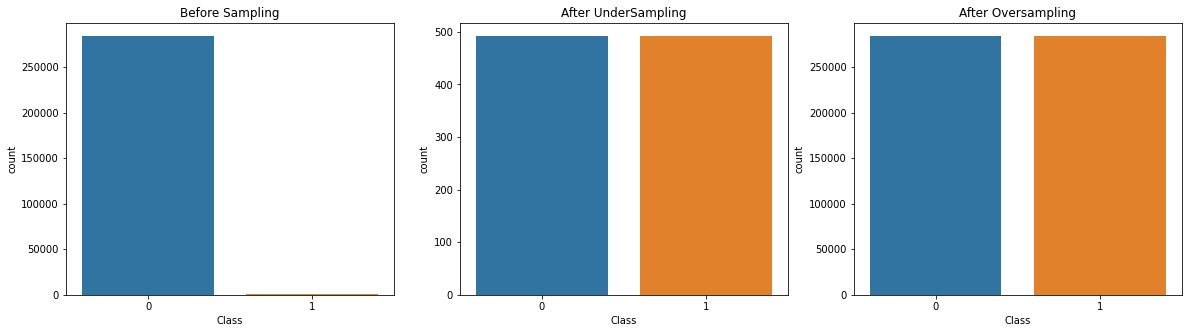

In [ ]:
RUS = RandomUnderSampler()
SMO = SMOTE()
x_under, y_under = RUS.fit_resample(x_sel, y)
x_over, y_over = SMO.fit_resample(x_sel, y)
print(y_under.value_counts()/len(y_under))

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sb.countplot(y)
plt.title('Before Sampling')

plt.subplot(1, 3, 2)
sb.countplot(y_under)
plt.title('After UnderSampling')

plt.subplot(1, 3, 3)
sb.countplot(y_over)
plt.title('After Oversampling')
plt.show

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
pipes = [
    ("DT", Pipeline([('model', DecisionTreeClassifier())])),
    ("RF", Pipeline([('model', RandomForestClassifier())])),
    ("XGB", Pipeline([('model', XGBClassifier())])),
    ("DT Balanced", Pipeline([('model', DecisionTreeClassifier(class_weight='balanced'))])),
    ("RF Balanced", Pipeline([('model', RandomForestClassifier(class_weight='balanced'))])),
    ("XGB Balanced", Pipeline([('model', XGBClassifier(class_weight='balanced'))])),
    ("DT Under", Pipeline([('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())])),
    ("RF Under", Pipeline([('under', RandomUnderSampler()), ('model', RandomForestClassifier())])),
    ("XGB Under", Pipeline([('under', RandomUnderSampler()), ('model', XGBClassifier())])),
    ("DT Over", Pipeline([('Over', SMOTE()), ('model', DecisionTreeClassifier())])),
    ("RF Over", Pipeline([('Over', SMOTE()), ('model', RandomForestClassifier())])),
    ("XGB Over", Pipeline([('Over', SMOTE()), ('model', XGBClassifier())])),
]

In [ ]:
for name, pipe in pipes:
  pipe_scores = cross_validate(pipe, x_sel, y, scoring = ('precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'), cv = cv, return_train_score=True, n_jobs=-1)

  print(name)
  print('Mean Precision: %.4f' % pipe_scores['test_precision_macro'].mean())
  print('Mean Recall: %.4f' % pipe_scores['test_recall_macro'].mean())
  print('Mean F1: %.4f' % pipe_scores['test_f1_macro'].mean())
  print('Mean ROC AUC: %.4f' % pipe_scores['test_roc_auc'].mean())

DT
Mean Precision: 0.8766
Mean Recall: 0.8880
Mean F1: 0.8814
Mean ROC AUC: 0.8880
RF
Mean Precision: 0.9763
Mean Recall: 0.8923
Mean F1: 0.9301
Mean ROC AUC: 0.9448
XGB
Mean Precision: 0.9604
Mean Recall: 0.8902
Mean F1: 0.9221
Mean ROC AUC: 0.9799
DT Balanced
Mean Precision: 0.8795
Mean Recall: 0.8687
Mean F1: 0.8740
Mean ROC AUC: 0.8687
RF Balanced
Mean Precision: 0.9780
Mean Recall: 0.8811
Mean F1: 0.9239
Mean ROC AUC: 0.9470
XGB Balanced
Mean Precision: 0.9604
Mean Recall: 0.8902
Mean F1: 0.9221
Mean ROC AUC: 0.9799
DT Under
Mean Precision: 0.5078
Mean Recall: 0.9141
Mean F1: 0.4890
Mean ROC AUC: 0.9141
RF Under
Mean Precision: 0.5249
Mean Recall: 0.9382
Mean F1: 0.5397
Mean ROC AUC: 0.9797
XGB Under
Mean Precision: 0.5221
Mean Recall: 0.9402
Mean F1: 0.5336
Mean ROC AUC: 0.9807
DT Over
Mean Precision: 0.6792
Mean Recall: 0.8901
Mean F1: 0.7452
Mean ROC AUC: 0.8901


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RF Over
Mean Precision: 0.9267
Mean Recall: 0.9095
Mean F1: 0.9177
Mean ROC AUC: 0.9724


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGB Over
Mean Precision: 0.5498
Mean Recall: 0.9462
Mean F1: 0.5863
Mean ROC AUC: 0.9817
